This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [1]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
#reading the file

df=pd.read_csv("kc_house_data.csv")

In [3]:
#Display top 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Data tyes of all columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
#Statistical Summary of DataFrame
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.shape

(21613, 21)

Our data set consist of 21613 rows and 19 columns

# Data Cleaning

In [7]:
#Dropping Unecessary Columns
df.drop(['id','date'], axis = 1, inplace =True)

In [8]:
#Looking for duplicated values
df.duplicated().sum()

5

In [9]:
# dropping Duplicated values
df.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Now we have 21608 rows and 19 columns

# Exploratory Data Analysis


In [10]:
# Count of ecah floor

flrs = df.floors.value_counts().to_frame()
flrs

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: >

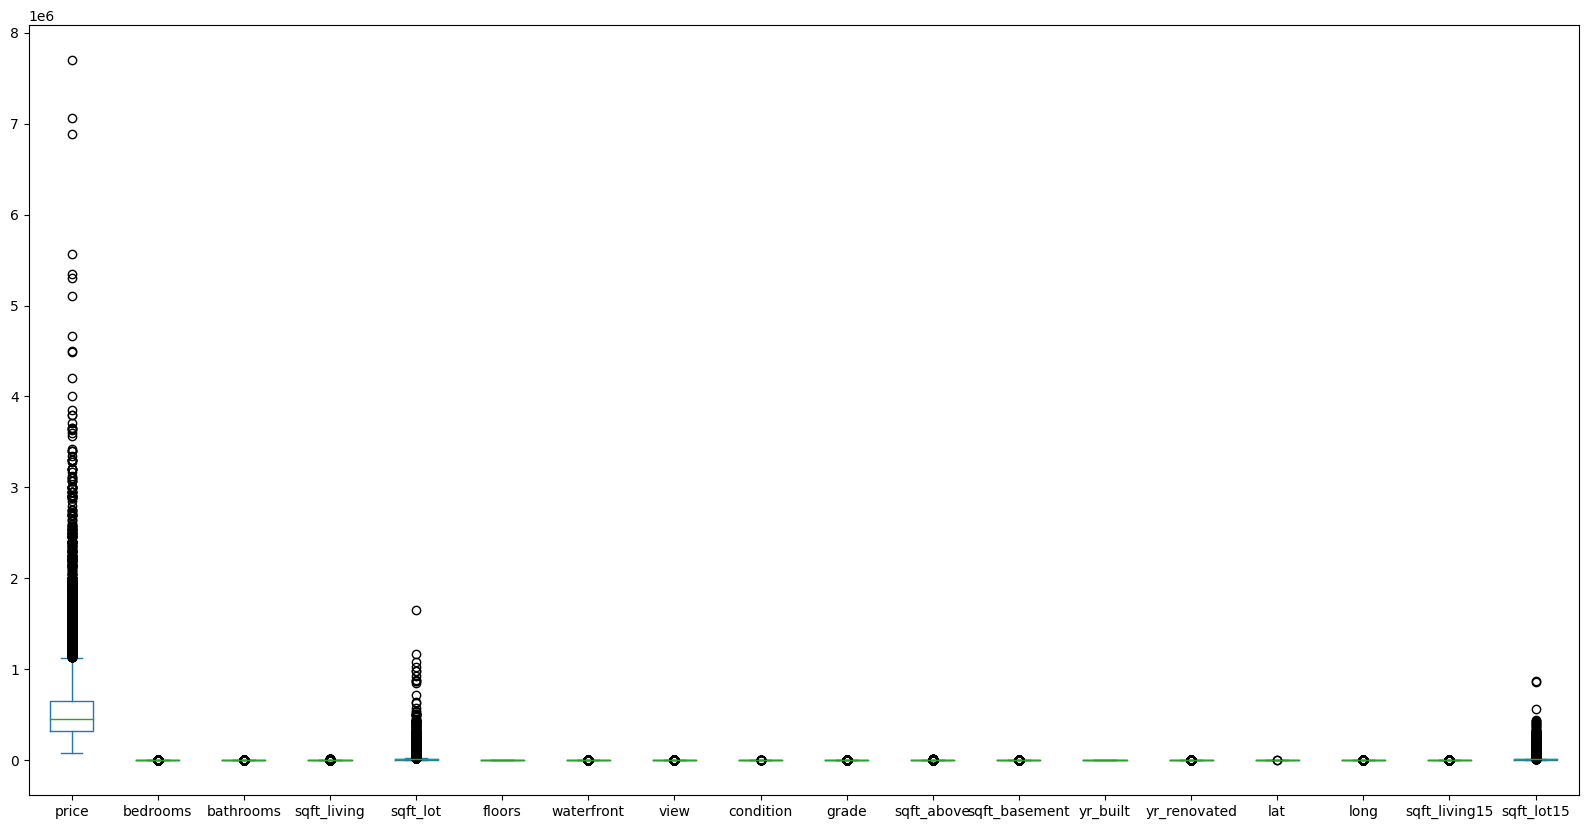

In [11]:
df[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].plot(kind = "box", figsize=(20,10))

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [12]:
#Correlation of Features w.r.t. Price column
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## Feature Selection 

we will use decision tree regressor for this.

In [13]:
x = df.drop("price",axis =1)
y = df["price"]

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
model = DecisionTreeRegressor(random_state=42)

In [16]:
model.fit(x,y)

DecisionTreeRegressor(random_state=42)

In [17]:
imp_feature = model.feature_importances_

In [18]:
imp_feature

array([0.0017823 , 0.00437942, 0.25330263, 0.02061848, 0.00079971,
       0.0330877 , 0.00784204, 0.00250761, 0.33784725, 0.02832786,
       0.00474696, 0.01696943, 0.0020033 , 0.01234366, 0.16713009,
       0.06420185, 0.02681949, 0.01529023])

In [19]:
new = pd.DataFrame({"Column name":x.columns , "importance":imp_feature})
new.sort_values("importance",ascending=False)

,Column name,importance
8,grade,0.337847
2,sqft_living,0.253303
14,lat,0.167130
15,long,0.064202
5,waterfront,0.033088
9,sqft_above,0.028328
16,sqft_living15,0.026819
3,sqft_lot,0.020618
11,yr_built,0.016969
17,sqft_lot15,0.015290


Now we will drop the columns that have less importance like "view","sqft_basement","bathrooms","condition","yr_renovated","bedrooms" and "floors"

In [20]:
df1 = df.drop(["view","sqft_basement","bathrooms","condition","yr_renovated","bedrooms","floors"],axis = 1 )

# Data Preprocessing

In [21]:
x = df1.drop("price",axis =1)
y = df1["price"]

#Splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
SC = StandardScaler()
x_train_norm = SC.fit_transform(x_train)

In [24]:
x_test_norm = SC.transform(x_test)

# Model Development


## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train_norm, y_train)


LinearRegression()

In [26]:
lm.score(x_train_norm,y_train)

0.6824631681875457

In [27]:
lm.score(x_test_norm,y_test)

0.6739084145417761

In [28]:
#predicting 
pred_lr = lm.predict(x_test_norm)


#Finding out accuracy of the predicted and actual value
from sklearn.metrics import r2_score
r2_score(y_test,pred_lr)


0.6739084145417761

-> Accuracy is around 67 percentage which is pretty much low.

## Decision Tree Regressor

In [29]:
dt = DecisionTreeRegressor(criterion="squared_error",max_depth=7,random_state=42)

In [30]:
dt.fit(x_train_norm,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [31]:
dt.score(x_train_norm,y_train)

0.8359118677748582

In [32]:
dt.score(x_test_norm,y_test)

0.7706044325515088

--> Accuracy is around 77 percentage.

## SGD Regressor

In [33]:
from sklearn.linear_model import SGDRegressor

In [34]:
sgdr = SGDRegressor(max_iter=1000)

In [35]:
#fitting model
sgdr.fit(x_train_norm,y_train)

SGDRegressor()

In [36]:
sgdr.score(x_train_norm,y_train)

0.6804492469393223

In [37]:
sgdr.score(x_test_norm,y_test)

0.6688221225680571

In [38]:
#predicting
pred_sgd = sgdr.predict(x_test_norm)

#Accuracy of predicted and actual value
r2_score(y_test,pred_sgd)

0.6688221225680571

--> Accuracy is around 67 percentage,Which is low as compared to other models.

----> SO the best model that have better accuracy is Decision tree Regressor
      Therefore, We will be using Decison tree Regressor for our prediction

In [39]:
#predicting using Decisiontree Regressor
pred_dt = dt.predict(x_test_norm)

#Accuracy
r2_score(y_test,pred_dt)

0.7706044325515088

<Axes: xlabel='price', ylabel='Density'>

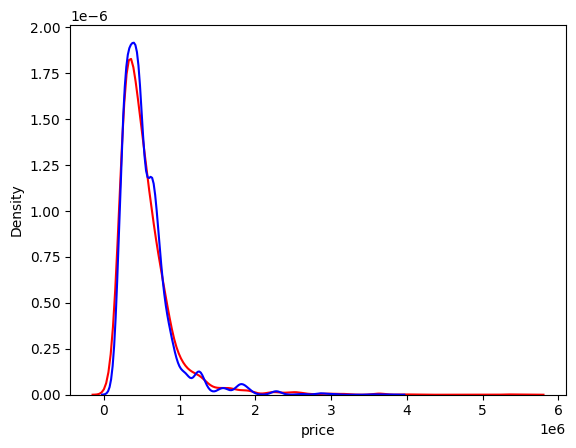

In [40]:
#kdeplot of Predicted and actual value
axi = sns.kdeplot(y_test,color="r",label="Actual Value")
sns.kdeplot(pred_dt,color="b",label="Fitted value",ax=axi)

As we can see clearly from kde plot that our predicted value and the actual value are mostly same.
Therefore this model is ready for deployment.